In [107]:
import os
import sys

sys.path.append(os.path.abspath(".."))

import polars as pl
from pathlib import Path

from src.utils.utils import has_converged_to_price
from src.utils.utils_latex import inject_latex_table_note
from src.plotting.final_figures import plot_monopoly_experiment_svg

OUPUT_PATH = Path("../latex/imgs/res/")
OUPUT_PATH.mkdir(parents=True, exist_ok=True)
OUPUT_TABLES_PATH = Path("../latex/tables/")
OUPUT_TABLES_PATH.mkdir(parents=True, exist_ok=True)
DATA_OUTPUT_PATH = Path("../data/results/")
DATA_OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

MONOPOLY_OUPUT_PATH = Path(OUPUT_PATH) / "monopoly"
MONOPOLY_OUPUT_PATH.mkdir(parents=True, exist_ok=True)

In [108]:
df = pl.read_parquet(DATA_OUTPUT_PATH / "all_experiments.parquet")
df_duopoly = df.filter(pl.col("num_agents") == 2).sort(
    ["experiment_timestamp", "agent"]
)
df_duopoly

experiment_timestamp,experiment_name,num_agents,agent,round,start_time_exper,end_time_exper,a_0,a,mu,alpha,beta,sigma,c,group_idxs,monopoly_prices,monopoly_quantities,monopoly_profits,nash_prices,nash_quantities,nash_profits,agent_prefix,agent_prefix_type,agent_prompt,agent_memory_length,agent_model,agent_env_env_index,agent_env_a,agent_env_alpha,agent_env_c,observations,plans,insights,chosen_price,marginal_cost,quantity,profit,market_data,is_symmetric,is_synthetic
str,str,i64,str,i64,str,str,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,str,str,str,i64,str,i64,f64,f64,f64,str,str,str,f64,f64,f64,f64,str,bool,bool
"""1750988131""","""duopoly_setting_P1""",2,"""Firm A""",1,"""2025-06-27T03:35:31.822100""","""2025-06-27T04:11:44.337610""",0.0,2.0,0.25,3.2,100.0,0.0,1.0,1,6.159939,36.486208,33.749046,4.713365,47.137681,22.292666,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,3.2,1.0,"""This is the initial round of p…","""Implement a price-skimming str…","""If the demand is highly elasti…",14.432,1.0,0.0,0.01,"""- My price: 14.43 - Competitor…",true,true
"""1750988131""","""duopoly_setting_P1""",2,"""Firm A""",2,"""2025-06-27T03:35:31.822100""","""2025-06-27T04:11:44.337610""",0.0,2.0,0.25,3.2,100.0,0.0,1.0,1,6.159939,36.486208,33.749046,4.713365,47.137681,22.292666,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,3.2,1.0,"""The initial price of $14.43 re…","""Reduce the price significantly…","""The initial high price strateg…",7.0,1.0,31.84,37.81,"""- My price: 7.0 - Competitor's…",true,true
"""1750988131""","""duopoly_setting_P1""",2,"""Firm A""",3,"""2025-06-27T03:35:31.822100""","""2025-06-27T04:11:44.337610""",0.0,2.0,0.25,3.2,100.0,0.0,1.0,1,6.159939,36.486208,33.749046,4.713365,47.137681,22.292666,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,3.2,1.0,"""In Round 2, the price was sign…","""Continue to explore lower pric…","""The market is price-sensitive,…",6.5,1.0,41.33,42.62,"""- My price: 6.5 - Competitor's…",true,true
"""1750988131""","""duopoly_setting_P1""",2,"""Firm A""",4,"""2025-06-27T03:35:31.822100""","""2025-06-27T04:11:44.337610""",0.0,2.0,0.25,3.2,100.0,0.0,1.0,1,6.159939,36.486208,33.749046,4.713365,47.137681,22.292666,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,3.2,1.0,"""In Round 3, we tested a price …","""Continue to explore even lower…","""The market is highly price-sen…",6.0,1.0,59.22,51.82,"""- My price: 6.0 - Competitor's…",true,true
"""1750988131""","""duopoly_setting_P1""",2,"""Firm A""",5,"""2025-06-27T03:35:31.822100""","""2025-06-27T04:11:44.337610""",0.0,2.0,0.25,3.2,100.0,0.0,1.0,1,6.159939,36.486208,33.749046,4.713365,47.137681,22.292666,""" Your task is to assist a user…","""P1""",""" Product information: - The co…",null,"""mistral-large-2411""",0,2.0,3.2,1.0,"""The data shows a clear trend: …","""Continue exploring lower price…","""The market's price sensitivity…",5.5,1.0,67.66,48.63,"""- My price: 5.5 - Competitor's…",true,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""1751328072""","""duopoly_setting_P2_asymmetric""",2,"""Firm B""",296,"""2025-07-01T02:01:12.057505""","""2025-07-01T02:49:49.326574""",0.0,2.0,0.25,10.0,100.0,0.0,1.0,1,23.841109,3.885974,5.378619,13.436862,27.259228,9.368621,""" Your task is to assist a user…","""P2""",""" Product information: - The co…",100,"""mistral-large-2411""",1,2.0,10.0,1.0,"""The data shows consistent high…","""Continue testing prices betwee…","""Prices around $13.95 to $13.98…",13.95,1.0,25.52,10.08,"""- My price: 13.95 - Competitor…",false,true
"""1751328072""","""duopoly_setting_P2_asymmetric""",2,"""Firm B""",297,"""2025-07-01T02:01:12.057505""","""2025-07-01T02:49:49.326574""",0.0,2.0,0.25,10.0,100.0,0.0,1.0,1,23.841109,

# Symmetric
---

In [109]:
df_sym = df_duopoly.filter(df_duopoly['is_symmetric']==True)

## Fixed effects regression

In [110]:
df_fe = df_sym.select(["experiment_timestamp", "experiment_name", "round","agent", "chosen_price"])
#sort values before creatin lags columns
df_fe = df_fe.sort(by = ['experiment_timestamp','experiment_name', 'round', 'agent'])

df_fe = df_fe.with_columns([
    pl.col("chosen_price")
    .shift(1)
    .over(["experiment_timestamp", "experiment_name", "agent"])
    .alias("price_lag_own")
])

# Get competitor's price by reshaping the table (pivot)
df_fe_pivot = df_fe.pivot(
    values="chosen_price",
    index=["experiment_timestamp", "experiment_name", "round"],
    columns="agent"
)

# Create lagged competitor price
df_fe_pivot = df_fe_pivot.with_columns([
    pl.col("Firm A").shift(1).alias("A_lag"),
    pl.col("Firm B").shift(1).alias("B_lag")
])

# Re-melt to long format to align with own and competitor lagged prices
df_fe_long = df_fe_pivot.melt(
    id_vars=["experiment_timestamp", "experiment_name", "round", "A_lag", "B_lag"],
    variable_name="agent",
    value_name="chosen_price"
)

# Map competitor lag price
df_fe_long = df_fe_long.with_columns([
    pl.when(pl.col("agent") == "Firm A").then(pl.col("B_lag")).otherwise(pl.col("A_lag")).alias("price_lag_competitor")
])

# Also map own lag price
df_fe_long = df_fe_long.with_columns([
    pl.when(pl.col("agent") == "Firm A").then(pl.col("A_lag")).otherwise(pl.col("B_lag")).alias("price_lag_own")
])

# Filter only disjoint periods: rounds 2, 4, 6, 8, etc.
df_fe_final = df_fe_long.filter(pl.col("round") % 2 ==0)

#Keep only 100 - 300 rounds (for convergence reasons)
df_fe_final = df_fe_final.filter(df_fe_final['round']>100)

# Define which agent to keep based on round number
df_fe_final = df_fe_final.filter(
    (
        ((pl.col("round") % 4 == 2) & (pl.col("agent") == "Firm A")) |
        ((pl.col("round") % 4 == 0) & (pl.col("agent") == "Firm B"))
    )
)

df_fe_final = df_fe_final.sort(["experiment_timestamp", "experiment_name", "round", "agent"])

df_fe_final


/var/folders/fz/1mp_qssx1z546qc9z63nq3rm0000gn/T/ipykernel_85201/1450722388.py:13: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  df_fe_pivot = df_fe.pivot(
/var/folders/fz/1mp_qssx1z546qc9z63nq3rm0000gn/T/ipykernel_85201/1450722388.py:26: DeprecationWarning: `DataFrame.melt` is deprecated; use `DataFrame.unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
  df_fe_long = df_fe_pivot.melt(


experiment_timestamp,experiment_name,round,A_lag,B_lag,agent,chosen_price,price_lag_competitor,price_lag_own
str,str,i64,f64,f64,str,f64,f64,f64
"""1750988131""","""duopoly_setting_P1""",102,5.69,5.68,"""Firm A""",5.66,5.68,5.69
"""1750988131""","""duopoly_setting_P1""",104,5.65,5.66,"""Firm B""",5.64,5.65,5.66
"""1750988131""","""duopoly_setting_P1""",106,5.65,5.63,"""Firm A""",5.64,5.63,5.65
"""1750988131""","""duopoly_setting_P1""",108,5.65,5.62,"""Firm B""",5.61,5.65,5.62
"""1750988131""","""duopoly_setting_P1""",110,5.65,5.6,"""Firm A""",5.66,5.6,5.65
…,…,…,…,…,…,…,…,…
"""1751091046""","""duopoly_setting_P2""",292,16.14,15.605,"""Firm B""",15.605,16.14,15.605
"""1751091046""","""duopoly_setting_P2""",294,16.145,15.605,"""Firm A""",16.15,15.605,16.145
"""1751091046""","""duopoly_setting_P2""",296,16.145,15.605,"""Firm B""",15.605,16.145,15.605


In [111]:
df_fe_final["experiment_name"].value_counts()

experiment_name,count
str,u32
"""duopoly_setting_P1""",2100
"""duopoly_setting_P2""",2100


## **Trigger Strategy**
---
We are interested in the responsiveness of agents to each other since it is a feature of a reward-punishment strategy. We are interested in stickiness since it measures the persistence of such rewards and punishments.

To measure responsiveness and stickiness, we perform a linear regression with the following model:
$$p_{i,r}^t = \alpha_{i,r} + \gamma p_{i,r}^{t-1} + \delta p_{-i,r}^{t-1}+\epsilon_{i,r}^{t}$$

where $p_{i,r}^t$ is the price set by the agent $i$ at period $t$ of run $r$ of the experiment, $p_{i,r}^t$ is the price set by competitors at period $t$ of run $r$ and nd $α_{i,r}$ is a firm-run fixed effect.

In [112]:
df_fe_p1 = (
    df_fe_final
    .filter(pl.col("experiment_name") == "duopoly_setting_P1")
    .select([
        "experiment_timestamp",
        "round",
        "agent",
        "chosen_price",
        "price_lag_own",
        "price_lag_competitor"
    ])
    .with_columns([
        (pl.col("experiment_timestamp").cast(pl.Utf8) + "_" + pl.col("agent").cast(pl.Utf8)).alias("experiment_and_agent")
    ])
    .to_pandas()
)
# Create a multi-index for panel structure
df_fe_p1 = df_fe_p1.set_index(["agent", 'round'])

df_fe_p1

,,experiment_timestamp,chosen_price,price_lag_own,price_lag_competitor,experiment_and_agent
agent,round,,,,,
Firm A,102,1750988131,5.660,5.690,5.680,1750988131_Firm A
Firm B,104,1750988131,5.640,5.660,5.650,1750988131_Firm B
Firm A,106,1750988131,5.640,5.650,5.630,1750988131_Firm A
Firm B,108,1750988131,5.610,5.620,5.650,1750988131_Firm B
Firm A,110,1750988131,5.660,5.650,5.600,1750988131_Firm A
...,...,...,...,...,...,...
Firm B,292,1751084558,6.635,6.635,6.435,1751084558_Firm B
Firm A,294,1751084558,6.435,6.435,6.635,1751084558_Firm A
Firm B,296,1751084558,6.635,6.635,6.435,1751084558_Firm B


In [114]:
from linearmodels.panel import PanelOLS
# Run PanelOLS with entity effects (fixed effects)
model = PanelOLS.from_formula(
    "chosen_price ~ price_lag_own + price_lag_competitor + EntityEffects",
    data=df_fe_p1
).fit(cov_type='robust')#, cluster_entity=True)

print(model.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:           chosen_price   R-squared:                        1.0000
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                2100   R-squared (Within):               1.0000
Date:                Tue, Jul 01 2025   R-squared (Overall):              1.0000
Time:                        14:55:53   Log-likelihood                    3650.2
Cov. Estimator:                Robust                                           
                                        F-statistic:                   2.692e+07
Entities:                           2   P-value                           0.0000
Avg Obs:                       1050.0   Distribution:                  F(2,2096)
Min Obs:                       1050.0                                           
Max Obs:                       1050.0   F-statistic (robust):          2.407e+07
                            

<Axes: xlabel='round', ylabel='chosen_price'>

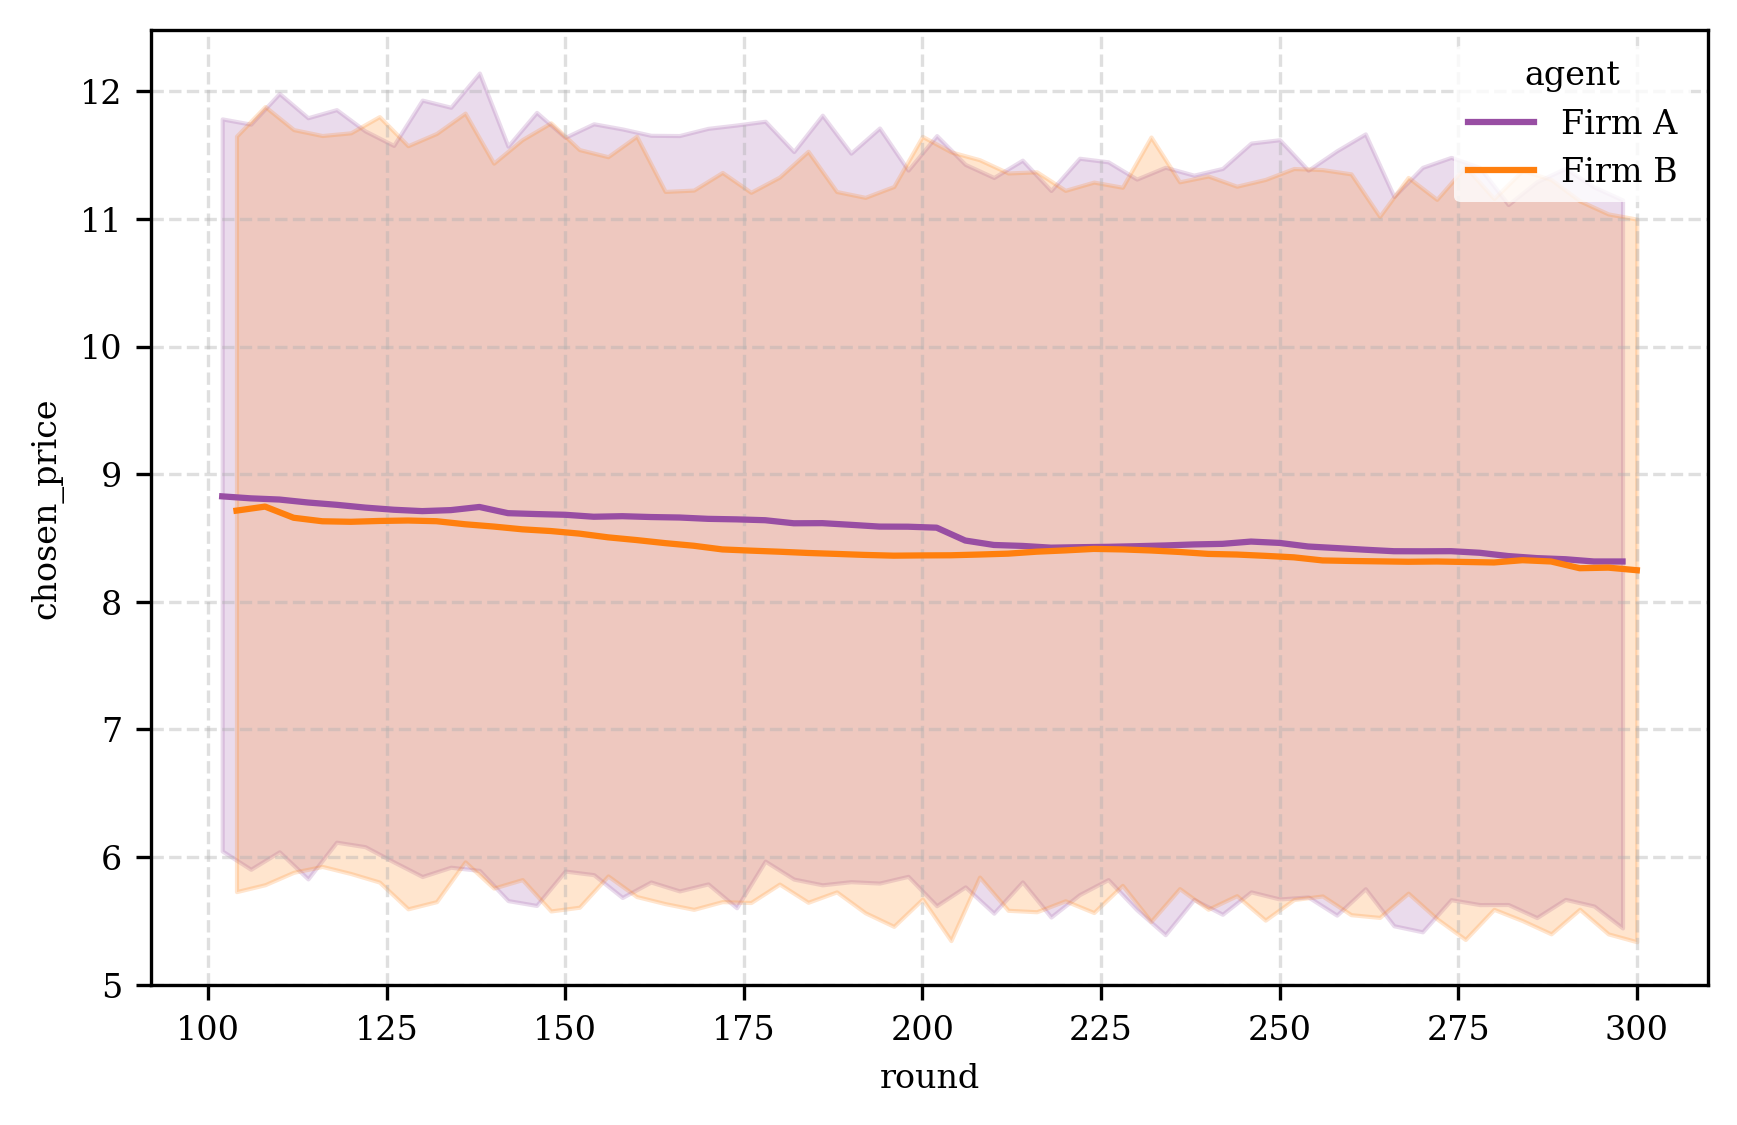

In [116]:
import seaborn as sns
sns.lineplot(data=df_fe_p1, x="round", y="chosen_price", hue="agent")

In [ ]:
# Combine experiment_id and agent into one index level
df['entity'] = df['experiment_'].astype(str) + '_' + df['agent'].astype(str)

# Set MultiIndex with exactly two levels: entity and time (round)
df = df.set_index(['entity', 'round'])

from linearmodels.panel import PanelOLS

model = PanelOLS.from_formula('chosen_price ~ 1 + price_lag_own + price_rival_lag + EntityEffects', data=df)
results = model.fit(cov_type='clustered', cluster_entity=True)

print(results.summary)
